In [1]:
import pickle
import pandas as pd
import glob
import os
import fnmatch
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Rectangle
import numpy as np

In [2]:
mpl.rcParams["text.usetex"] = True
mpl.rcParams["axes.formatter.use_mathtext"] = True

### Optimality Gap vs. Time

In [3]:
path_stem = "demonstrate_results"

# Find the CSV files with names containing "pc=NoPreconditioner"
no_preconditioner_files = glob.glob(os.path.join(path_stem, '*pc=NoPreconditioner*history.csv'))
no_preconditioner_dfs = [pd.read_csv(file) for file in no_preconditioner_files]

# Find the CSV files with names containing "pc=PartialCholesky"
pc_files = glob.glob(os.path.join(path_stem, '*pc=PartialCholesky*history.csv'))
pc_dfs = [pd.read_csv(file) for file in pc_files]

# Find the CSV files with names containing "pc=Nystrom"
nystrom_files = glob.glob(os.path.join(path_stem, '*pc=Nystrom*history.csv'))
nystrom_dfs = [pd.read_csv(file) for file in nystrom_files]

In [4]:
# Find the latest CSV files
latest_no_preconditioner_file = max(no_preconditioner_files, key=os.path.getmtime)
latest_nystrom_file = max(nystrom_files, key=os.path.getmtime)

print("Latest No Preconditioner File:\n", os.path.basename(latest_no_preconditioner_file))
print("Latest Nystrom File:\n", os.path.basename(latest_nystrom_file))

Latest No Preconditioner File:
 ts=2024-04-19--02:59:02_prob=risk_model_m=50000_n=80000_k=100_pc=NoPreconditioner_rank=0_tol=1e-08_history.csv
Latest Nystrom File:
 ts=2024-04-18--15:55:46_prob=risk_model_m=50000_n=80000_k=100_pc=Nystrom_rank=20_tol=1e-08_history.csv


In [5]:
filename = os.path.basename(latest_nystrom_file)

# Extract the values of m and n from the filename
m = int(filename.split('_m=')[1].split('_n=')[0])
n = int(filename.split('_n=')[1].split('_k=')[0])

print("Value of m:", m)
print("Value of n:", n)

Value of m: 50000
Value of n: 80000


In [6]:
nys_df = pd.read_csv(latest_nystrom_file)
nys_df.head()

,iter,primal_feasibility,dual_feasibility,optimality_gap,inner_iter_predictor,inner_iter_corrector,krylov_tol,rank,construct_precond_elapsed,CG_solving_elapsed,cumulative_time
0,1,1398.292626,1.774906,0.076240,6,7,0.000001,20,22.067638,16.831332,41.164819
1,2,37.278890,0.154432,0.006048,11,12,0.000001,20,12.527509,27.966999,84.006339
2,3,14.135424,0.117972,0.011033,78,81,0.000001,20,12.274166,177.657086,275.061918
3,4,5.889482,0.049207,0.005759,81,97,0.000001,20,12.291763,199.286414,487.804687
4,5,0.029471,0.005706,0.000684,125,165,0.000001,20,11.805851,313.942704,814.639818


In [7]:
noP_df = pd.read_csv(latest_no_preconditioner_file)
noP_df.head()

,iter,primal_feasibility,dual_feasibility,optimality_gap,inner_iter_predictor,inner_iter_corrector,krylov_tol,rank,construct_precond_elapsed,CG_solving_elapsed,cumulative_time
0,1,1397.987756,1.774577,0.076225,78,89,0.000001,0,0.009549,181.337012,183.497120
1,2,37.252831,0.154429,0.006047,158,124,0.000001,0,0.009332,291.568541,477.146609
2,3,14.137508,0.117984,0.011031,801,610,0.000001,0,0.009356,1499.934819,1978.141742
3,4,5.896368,0.049255,0.005764,744,500,0.000001,0,0.009470,1319.681831,3298.918392
4,5,0.029505,0.005730,0.000687,852,824,0.000001,0,0.009369,1762.284223,5062.280570


In [8]:
port_fig_path = f"../../plots/fig_portfolio_m={m}_n={n}.pdf"

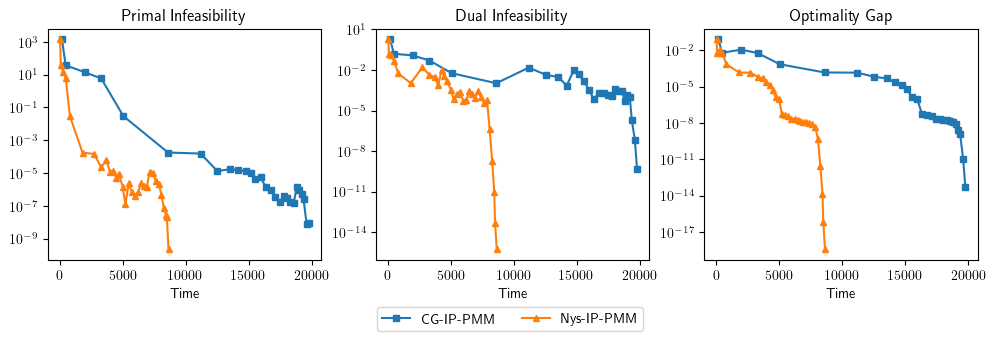

In [9]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=False, figsize=(12, 3))

# Primal infeasibility
axes[0].plot(noP_df['cumulative_time'], noP_df['primal_feasibility'], marker='s', markersize=4, linestyle='-', label='CG-IP-PMM')
axes[0].plot(nys_df['cumulative_time'], nys_df['primal_feasibility'], marker='^', markersize=4, linestyle='-', label='Nys-IP-PMM')
axes[0].set_title('Primal Infeasibility')
axes[0].set_xlabel('Time')
axes[0].set_yscale('log')

# Dual infeasibility
axes[1].plot(noP_df['cumulative_time'], noP_df['dual_feasibility'], marker='s', markersize=4, linestyle='-', label='CG-IP-PMM')
axes[1].plot(nys_df['cumulative_time'], nys_df['dual_feasibility'], marker='^', markersize=4, linestyle='-', label='Nys-IP-PMM')
axes[1].set_title('Dual Infeasibility')
axes[1].set_xlabel('Time')
axes[1].set_yscale('log')

# Optimality gap
axes[2].plot(noP_df['cumulative_time'], noP_df['optimality_gap'], marker='s', markersize=4, linestyle='-', label='CG-IP-PMM')
axes[2].plot(nys_df['cumulative_time'], nys_df['optimality_gap'], marker='^', markersize=4, linestyle='-', label='Nys-IP-PMM')
axes[2].set_title('Optimality Gap')
axes[2].set_xlabel('Time')
axes[2].set_yscale('log')

# Create a single legend for the entire figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.51, -0.15))

plt.savefig(port_fig_path, format='pdf', bbox_inches = 'tight')

plt.show()